In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [2]:
l = [0, 1, 2, 3, 4, 5]
mid = len(l) // 2
l = l[:mid] + l[mid:][::-1]

print(l)

[0, 1, 2, 5, 4, 3]


Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца.

In [18]:
l = list(range(1, 30))
l[3:11:2], l[-3:-11:-2] = l[-3:-11:-2], l[3:11:2]

print(l)

[1, 2, 3, 27, 5, 25, 7, 23, 9, 21, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 10, 22, 8, 24, 6, 26, 4, 28, 29]


## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [4]:
a = [1, 2, 3, 4, 5, 6]

[i**2 for i in a]

[1, 4, 9, 16, 25, 36]

Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять.

In [5]:
[i - 5 for i in a]

[-4, -3, -2, -1, 0, 1]

## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке.

In [6]:
s = 'abcdefg'

print(max(ord(i) for i in s) - min(ord(i) for i in s))

6


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру.

In [7]:
s = 'dfdfdfdfdfdfd'

res = "".join(sorted(s.upper()))

print(res)

DDDDDDDFFFFFF


## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [8]:
l = np.array([1, 2, 3, 4, 5, 6, 7, 8])
res = np.array([l[i:i + 4:] for i in range(len(l) - 3)])
res

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [9]:
a = np.array([0, 1, 2, 255])

def to_bin(n):
    return np.array(list(np.binary_repr(n, width=8)), dtype=int)

res = np.array([to_bin(i) for i in a])

print(res)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1]]


## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/MyDrive/laptop_price.csv', encoding='ISO-8859-1')

print(df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [12]:
na = df.isnull()
na.sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [13]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram'] = df['Ram'].astype(int)

df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)')
df[['Width', 'Height']] = df[['Width', 'Height']].astype(int)
df = df.drop('ScreenResolution', axis=1)

df['Cpu Name'] = df['Cpu'].str.split().str[:-1].str.join(' ')
df['Cpu frequency'] = df['Cpu'].str.split().str[-1].str.replace('GHz', '')
df['Cpu frequency'] = df['Cpu frequency'].astype(float)
df = df.drop('Cpu', axis=1)


df['Memory'] = df['Memory'].replace('\D0', '', regex=True)
df['Memory'] = df['Memory'].str.replace(r'(\d+)TB', lambda m: str(int(m.group(1)) * 1024) + 'GB', regex=True)

memory_types = set(re.findall(r'(?<=GB\s)([a-zA-Z]+(?:\s+[a-zA-Z]+)*)', ' '.join(df['Memory'])))
for memory_type in memory_types:
  i = r'(\d+)(?:GB) ' + memory_type
  df[memory_type] = df['Memory'].str.findall(i).apply(
      lambda x: sum([int(i) for i in x]) if x else 0)

df = df.drop('Memory', axis=1)

#df.to_csv('new_data.csv', index=False)
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Width,Height,Cpu Name,Cpu frequency,Flash Storage,HDD,SSD,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,Intel Core i5,2.3,0,0,128,0
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,Intel Core i5,1.8,128,0,0,0
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,Intel Core i5 7200U,2.5,0,0,256,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,Intel Core i7,2.7,0,0,512,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,Intel Core i5,3.1,0,0,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080,Intel Core i7 6500U,2.5,0,0,128,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800,Intel Core i7 6500U,2.5,0,0,512,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,Intel Celeron Dual Core N3050,1.6,64,0,0,0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,Intel Core i7 6500U,2.5,0,1024,0,0


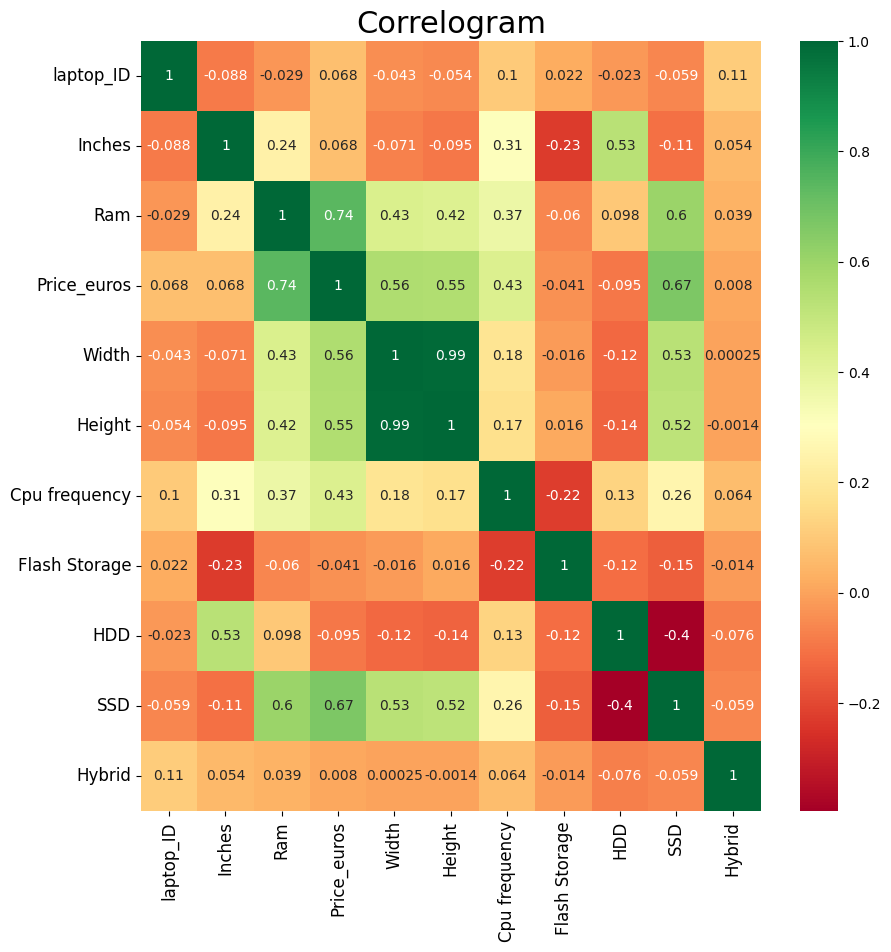

In [33]:
plt.figure(figsize=(10,10))
num = df.select_dtypes(include =['number'])
sns.heatmap(num.corr(), cmap='RdYlGn', annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

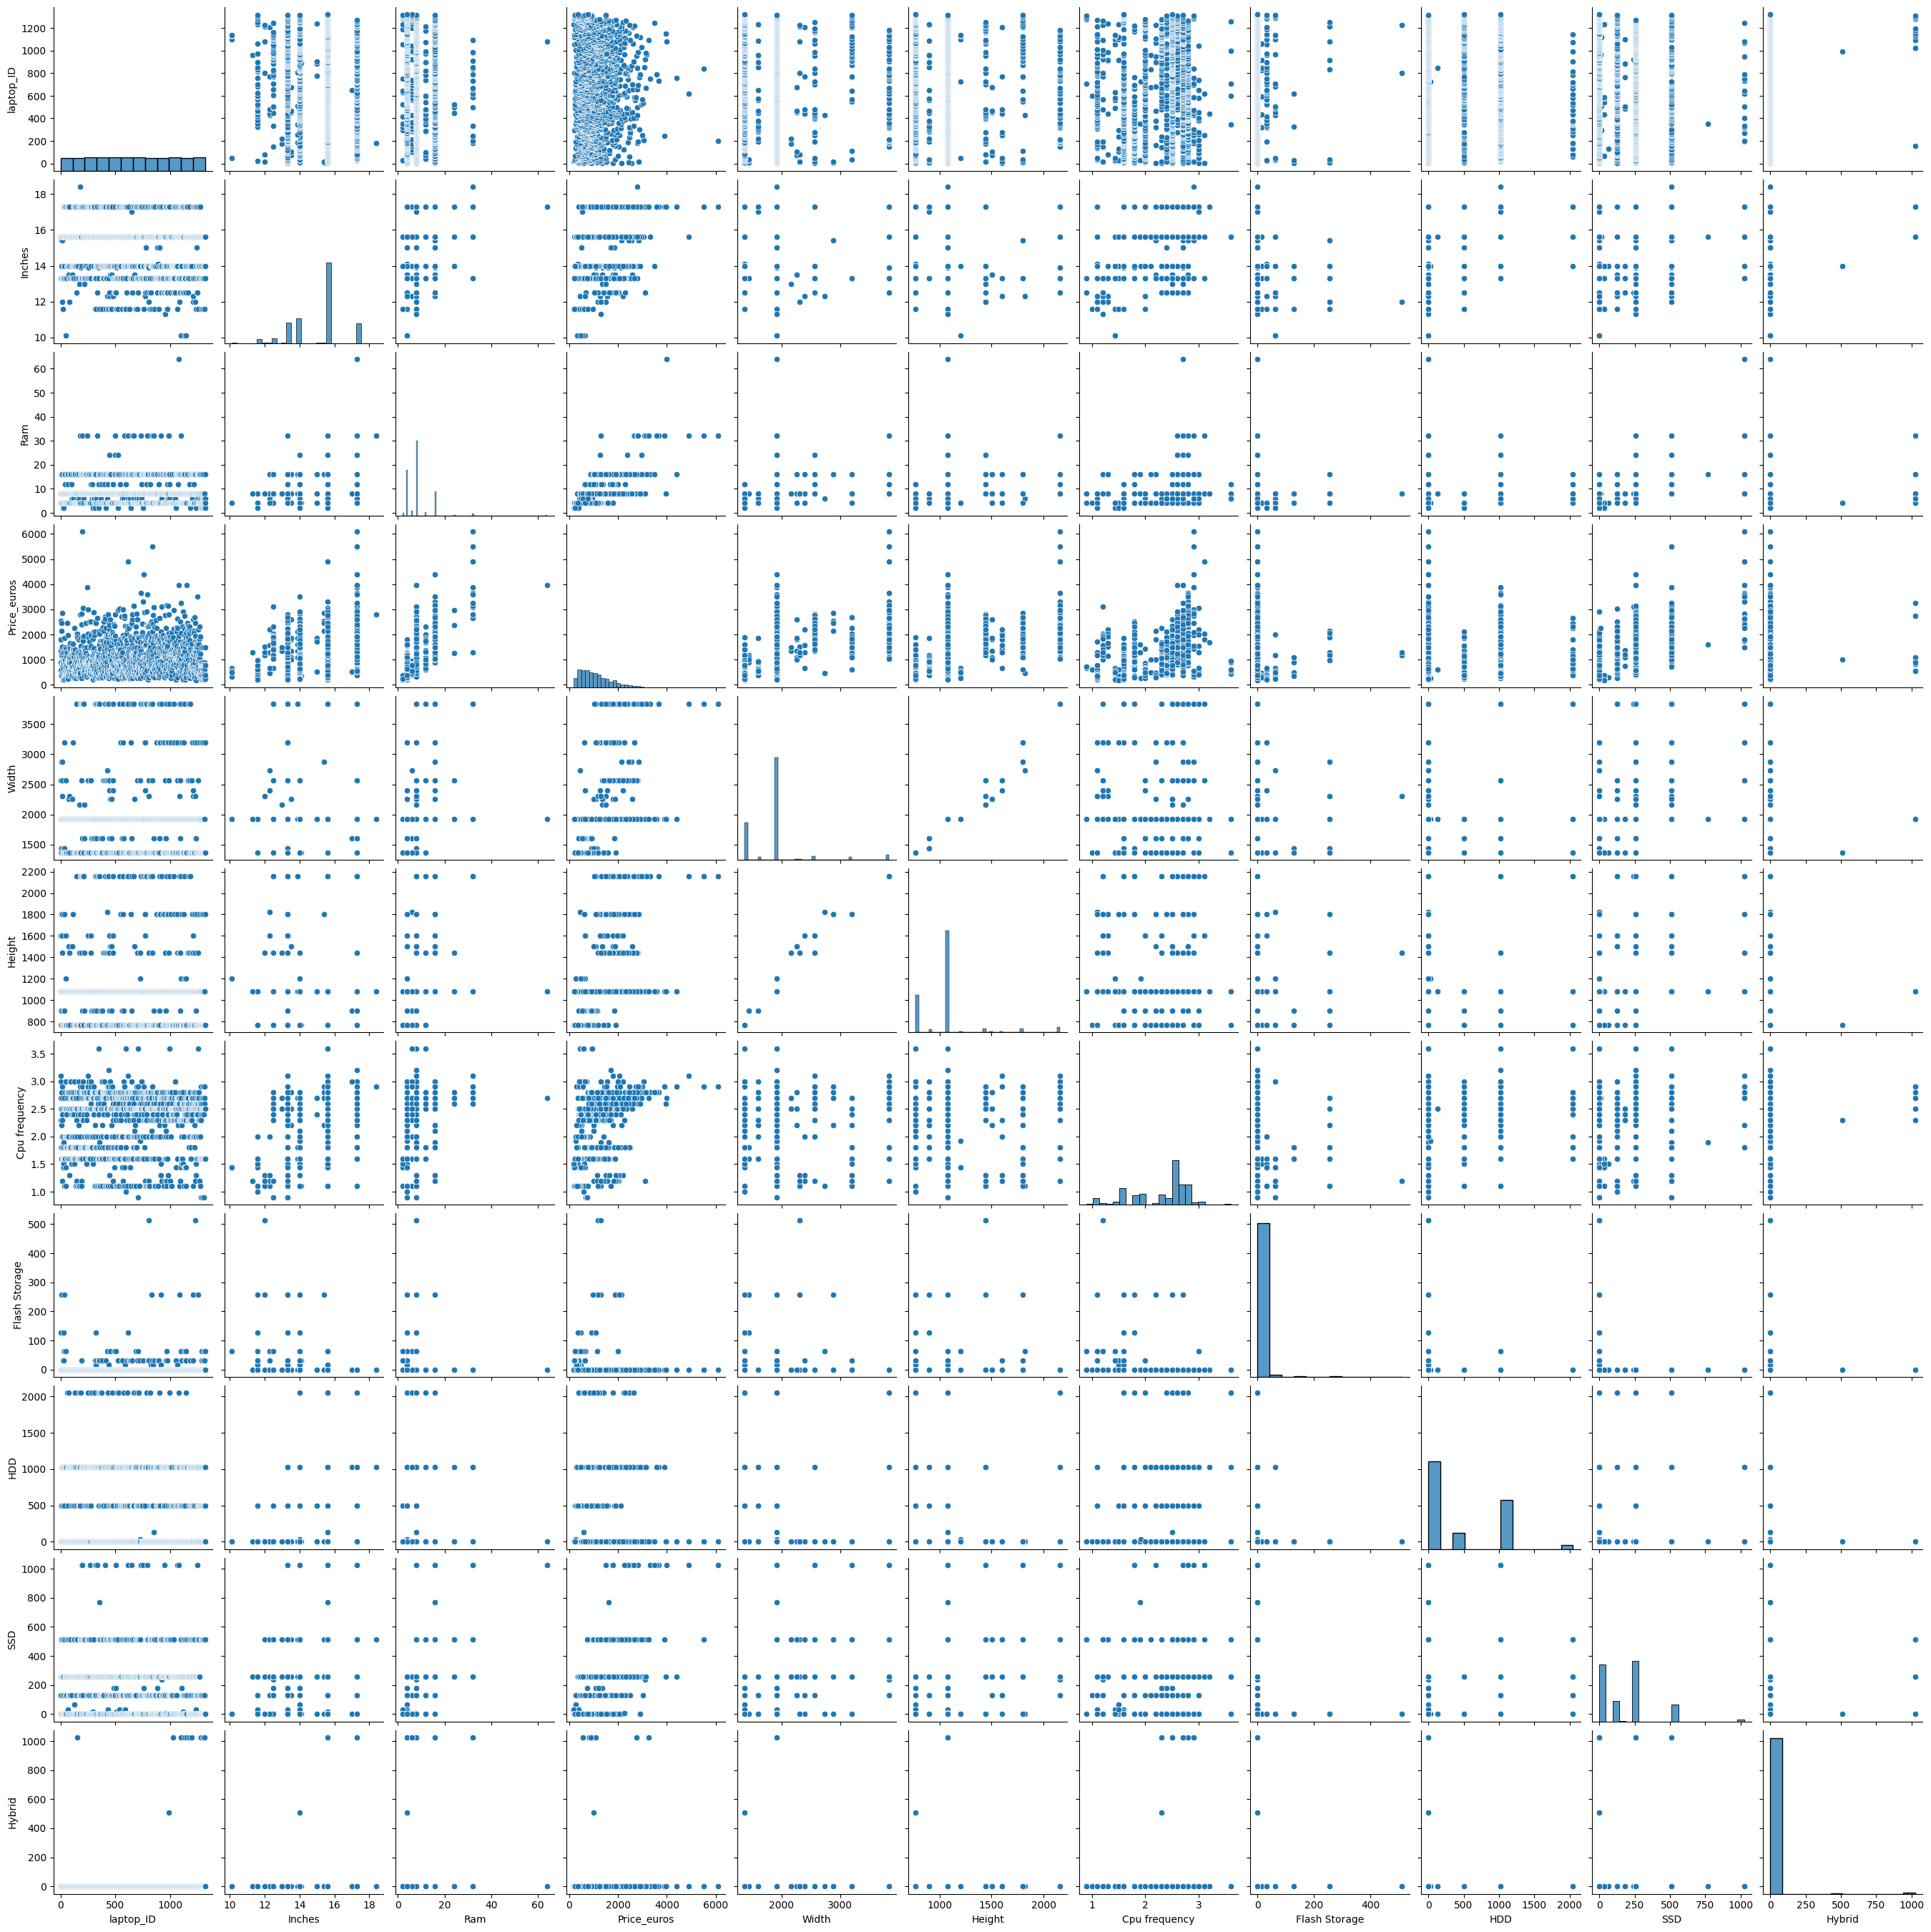

In [15]:
sns.pairplot(df, kind='scatter')
plt.show()

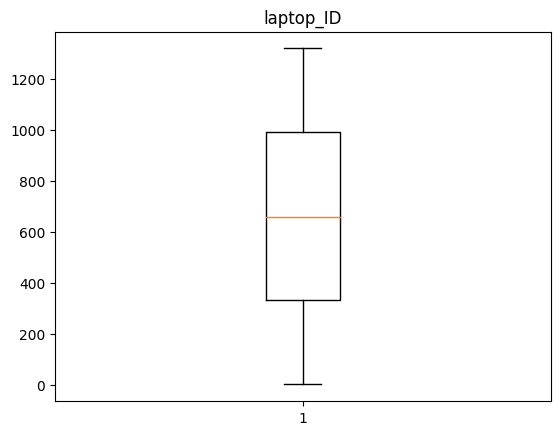

Выбросов в столбце 'laptop_ID' нет 

Столбец 'Company' не числовой 

Столбец 'Product' не числовой 

Столбец 'TypeName' не числовой 



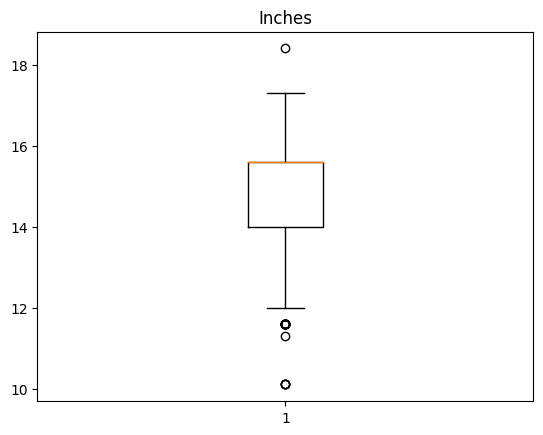

Выбросы в столбце 'Inches': [11.6, 10.1, 18.4, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.6, 11.3, 11.6, 11.6, 11.6, 10.1, 10.1, 10.1, 11.6, 11.6, 11.6, 11.6, 11.6] 

      laptop_ID   Company                               Product  \
20           21      Asus                       Vivobook E200HA   
50           51    Lenovo                             Yoga Book   
177         181       MSI                       GT80S 6QF-074US   
314         319      Asus                         VivoBook Flip   
319         324      Acer                          TravelMate B   
348         354      Asus                         VivoBook Flip   
376         382    Lenovo                              Yoga 11e   
409         416    Lenovo                        Lenovo IdeaPad   
429         436  Mediacom                         FlexBook Edge   
430         437   Samsung                          Chromebook 3  

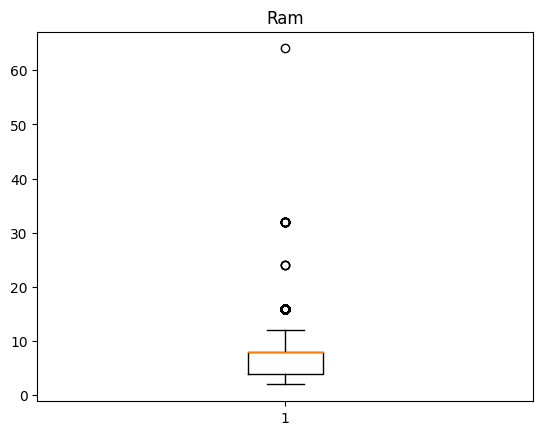

Выбросы в столбце 'Ram': [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 24, 16, 16, 16, 16, 16, 16, 32, 24, 16, 16, 24, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 64, 16, 16, 32, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16] 

      laptop_ID Company            Product            TypeName  Inches  Ram  \
3        

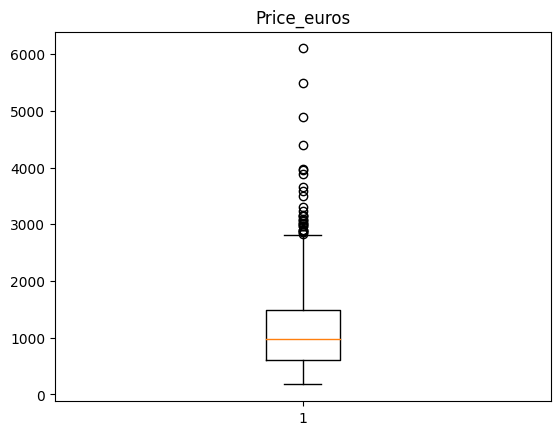

Выбросы в столбце 'Price_euros': [2858.0, 2824.0, 6099.0, 3055.0, 3890.0, 2999.0, 2884.86, 2968.0, 3012.77, 2999.0, 4899.0, 3147.37, 3659.4, 3299.0, 4389.0, 2868.99, 2899.0, 3588.8, 5499.0, 3072.89, 3100.0, 3154.0, 3149.0, 2968.0, 3975.0, 3240.0, 2899.0, 3949.4, 3499.0] 

      laptop_ID Company             Product            TypeName  Inches  Ram  \
17           18   Apple         MacBook Pro           Ultrabook    15.4   16   
190         194  Lenovo       Thinkpad Yoga  2 in 1 Convertible    14.0   16   
196         200   Razer           Blade Pro              Gaming    17.3   32   
204         208    Dell      Precision 7520         Workstation    15.6   16   
238         243    Asus   ROG G703VI-E5062T              Gaming    17.3   32   
247         252    Asus  Rog G701VIK-BA060T              Gaming    17.3   16   
297         302    Dell      Precision 7720         Workstation    17.3   16   
517         524    Asus        ROG Zephyrus              Gaming    15.6   24   
530    

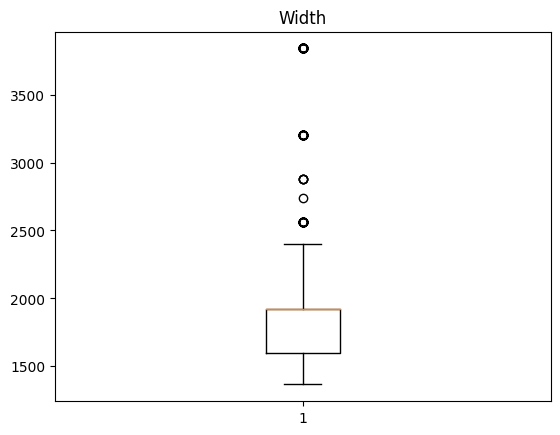

Выбросы в столбце 'Width': [2560, 2880, 2560, 2880, 2880, 2560, 2880, 3200, 2560, 3200, 3840, 3840, 3840, 3840, 2560, 3840, 3840, 3840, 3840, 2560, 2560, 2560, 3840, 3840, 3840, 3840, 3840, 2560, 2560, 3840, 2560, 2560, 3840, 2736, 2560, 3840, 2560, 2560, 3840, 3840, 3840, 3200, 3200, 3200, 3840, 3840, 3840, 3200, 3840, 3840, 2560, 2560, 3840, 3840, 3200, 3840, 3200, 3840, 3840, 2560, 3840, 3840, 3840, 3840, 2560, 3200, 3200, 3840, 3200, 3840, 3200, 3200, 2560, 3840, 3200, 3200, 2560, 3840, 3200, 3840, 3200, 2560, 3200, 3840, 2560, 3840, 3200, 3200, 3840, 2560, 2560, 2560, 3840, 2560, 3840, 2560, 3200, 3200, 3200, 2560, 3200, 3200, 3200, 3200] 

      laptop_ID Company         Product            TypeName  Inches  Ram  \
0             1   Apple     MacBook Pro           Ultrabook    13.3    8   
3             4   Apple     MacBook Pro           Ultrabook    15.4   16   
4             5   Apple     MacBook Pro           Ultrabook    13.3    8   
6             7   Apple     MacBook Pro   

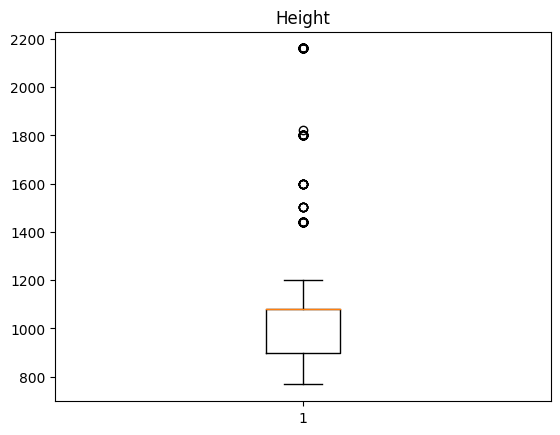

Выбросы в столбце 'Height': [1600, 1800, 1600, 1800, 1800, 1440, 1600, 1800, 1800, 1600, 1504, 1440, 1504, 1800, 2160, 1440, 2160, 2160, 2160, 1440, 2160, 2160, 2160, 2160, 1440, 1600, 1600, 1440, 2160, 2160, 2160, 2160, 2160, 1440, 1440, 2160, 1440, 1440, 2160, 1824, 1440, 2160, 1600, 1440, 1504, 1504, 1504, 1440, 2160, 1600, 2160, 2160, 1800, 1800, 1800, 2160, 2160, 2160, 1800, 2160, 2160, 1504, 1440, 1440, 2160, 2160, 1800, 2160, 1600, 1800, 2160, 2160, 1440, 1440, 2160, 2160, 2160, 2160, 1440, 1800, 1800, 2160, 1800, 2160, 1800, 1800, 1440, 2160, 1800, 1800, 1440, 2160, 1800, 2160, 1800, 1440, 1800, 2160, 1440, 1440, 2160, 1800, 1800, 2160, 1440, 1440, 1440, 2160, 1440, 2160, 1440, 1800, 1600, 1440, 1800, 1440, 1800, 1440, 1800, 1800, 1800, 1800] 

      laptop_ID Company         Product            TypeName  Inches  Ram  \
0             1   Apple     MacBook Pro           Ultrabook    13.3    8   
3             4   Apple     MacBook Pro           Ultrabook    15.4   16   
4        

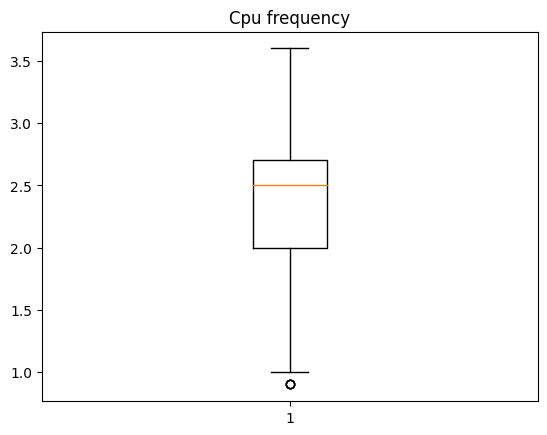

Выбросы в столбце 'Cpu frequency': [0.9, 0.9, 0.9, 0.9] 

      laptop_ID Company               Product            TypeName  Inches  \
697         705    Asus       Chromebook Flip  2 in 1 Convertible    12.5   
1261       1279    Asus  ZenBook UX305CA-UBM1           Ultrabook    13.3   
1275       1293    Asus  ZenBook UX305CA-UBM1           Ultrabook    13.3   
1289       1307    Asus  ZenBook UX305CA-UBM1           Ultrabook    13.3   

      Ram                    Gpu       OpSys Weight  Price_euros  Width  \
697     4  Intel HD Graphics 515   Chrome OS  1.2kg        669.0   1920   
1261    8  Intel HD Graphics 515  Windows 10  1.2kg        729.0   1920   
1275    8  Intel HD Graphics 515  Windows 10  1.2kg        729.0   1920   
1289    8  Intel HD Graphics 515  Windows 10  1.2kg        729.0   1920   

      Height              Cpu Name  Cpu frequency  Flash Storage  HDD  SSD  \
697     1080  Intel Core M M3-6Y30            0.9             64    0    0   
1261    1080     Intel C

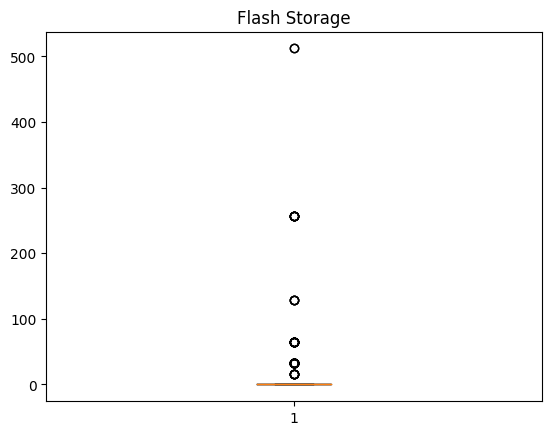

Выбросы в столбце 'Flash Storage': [128, 256, 256, 32, 128, 64, 32, 256, 64, 64, 32, 32, 16, 128, 32, 32, 32, 32, 32, 64, 16, 64, 64, 64, 32, 32, 32, 16, 32, 128, 32, 32, 32, 32, 64, 32, 32, 64, 32, 32, 32, 512, 32, 16, 256, 32, 16, 32, 32, 32, 256, 16, 32, 64, 32, 32, 16, 256, 64, 32, 64, 32, 64, 32, 32, 32, 256, 512, 256, 32, 64, 32, 64, 32, 64] 

      laptop_ID Company             Product   TypeName  Inches  Ram  \
1             2   Apple         Macbook Air  Ultrabook    13.3    8   
6             7   Apple         MacBook Pro  Ultrabook    15.4   16   
7             8   Apple         Macbook Air  Ultrabook    13.3    8   
20           21    Asus     Vivobook E200HA    Netbook    11.6    2   
26           27   Apple         MacBook Air  Ultrabook    13.3    8   
...         ...     ...                 ...        ...     ...  ...   
1272       1290  Lenovo  IdeaPad 100S-14IBR   Notebook    14.0    2   
1282       1300      HP    Stream 11-Y000na    Netbook    11.6    2   
1286     

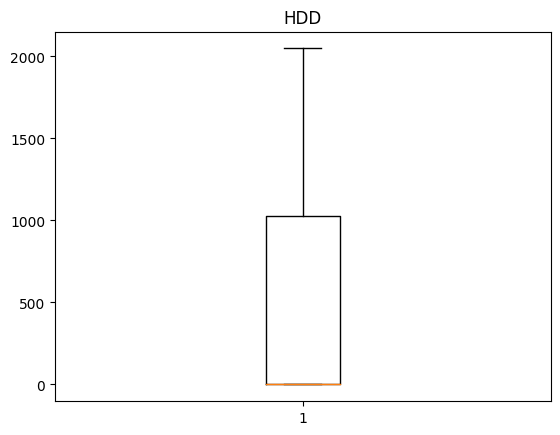

Выбросов в столбце 'HDD' нет 



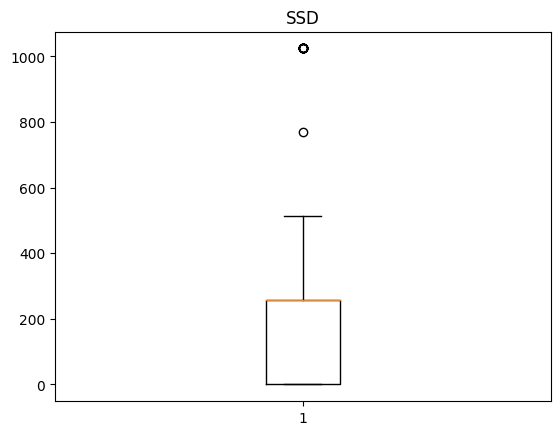

Выбросы в столбце 'SSD': [1024, 1024, 1024, 1024, 1024, 1024, 768, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024] 

      laptop_ID Company         Product            TypeName  Inches  Ram  \
190         194  Lenovo   Thinkpad Yoga  2 in 1 Convertible    14.0   16   
196         200   Razer       Blade Pro              Gaming    17.3   32   
266         271    Asus    ZenBook Flip  2 in 1 Convertible    13.3    8   
311         316    Dell          XPS 13           Ultrabook    13.3   16   
316         321      HP    Spectre x360  2 in 1 Convertible    13.3   16   
329         335    Dell          XPS 15            Notebook    15.6   32   
347         353    Dell   Latitude 5590           Ultrabook    15.6   16   
399         406  Lenovo     Thinkpad X1           Ultrabook    14.0   16   
497         504      HP   EliteBook 840            Notebook    14.0    8   
610         617  Lenovo    Thinkpad P51            Notebook    15.6   32   
639         647    Dell      

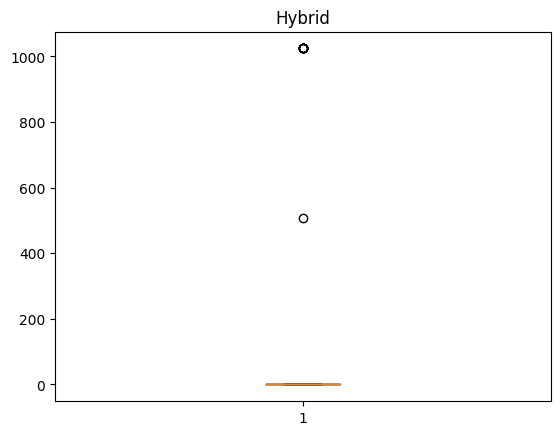

Выбросы в столбце 'Hybrid': [1024, 508, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024] 

      laptop_ID Company                              Product  TypeName  \
151         154    Dell                        Inspiron 7567    Gaming   
976         990  Lenovo                        ThinkPad T460  Notebook   
1010       1024    Dell                        Inspiron 7567    Gaming   
1081       1096  Lenovo                   IdeaPad Y900-17ISK    Gaming   
1116       1131  Lenovo                   IdeaPad Y900-17ISK    Gaming   
1135       1150  Lenovo                    IdeaPad 500-15ISK  Notebook   
1158       1176  Lenovo   B51-80 (i5-6200U/8GB/1008GB/Radeon  Notebook   
1176       1194  Lenovo  B51-80 (i7-6500U/4GB/1008GB/FHD/W7)  Notebook   
1258       1276  Lenovo   B51-80 (i7-6500U/8GB/1008GB/Radeon  Notebook   
1266       1284      HP                  Pavilion 15-AW003nv  Notebook   
1280       1298      HP                  Pavilion 15-AW003nv  Notebook   
1294      

In [16]:
def find_outliers(data):
  Q1 = data.quantile(0.25) # Первый квартиль(25-й процентиль)
  Q3 = data.quantile(0.75) # Третий квартиль(75-й процентиль)
  IQR = Q3 - Q1 # Межквартильный диапазон
  return data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)].tolist() # Минимум и максимум

for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

    outliers = find_outliers(df[col])
    if outliers:
      print(f"Выбросы в столбце '{col}': {outliers}", '\n')
      print(df[df[col].isin(outliers)])
    else:
      print(f"Выбросов в столбце '{col}' нет", '\n')
  else:
    print(f"Столбец '{col}' не числовой", '\n')

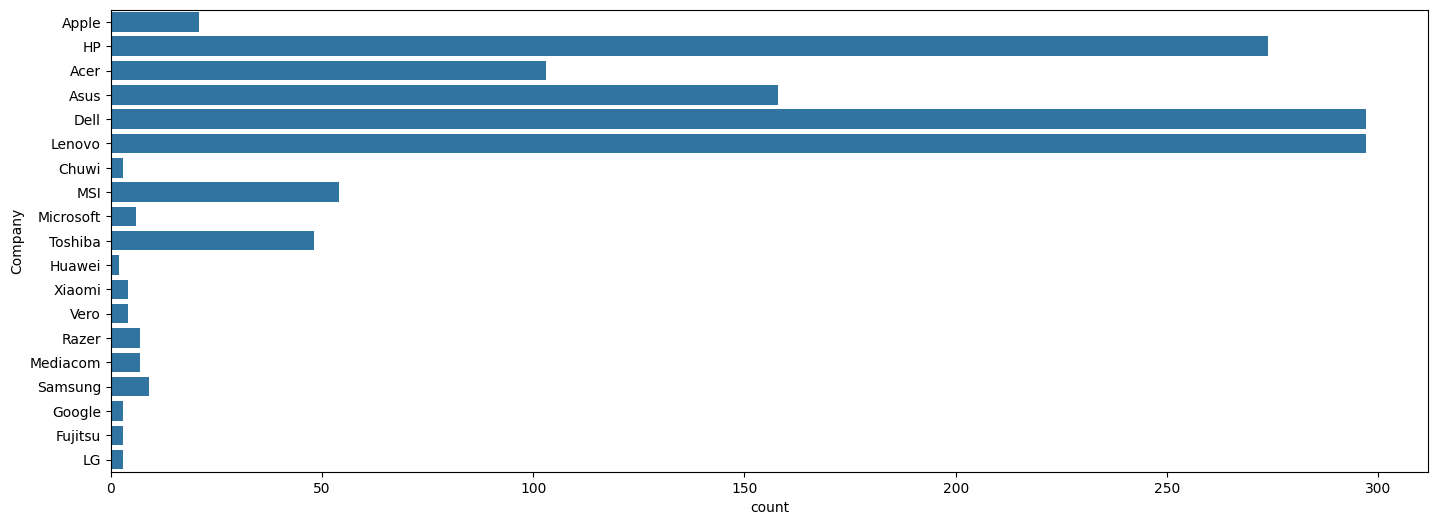

In [17]:
plt.figure(figsize=(17, 6))

sns.countplot(df['Company'])

plt.show()